## Handwritten digit classification 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the Handwritten digit dataset 

In [2]:
from keras.datasets import mnist

In [3]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
ytrain[0]

5

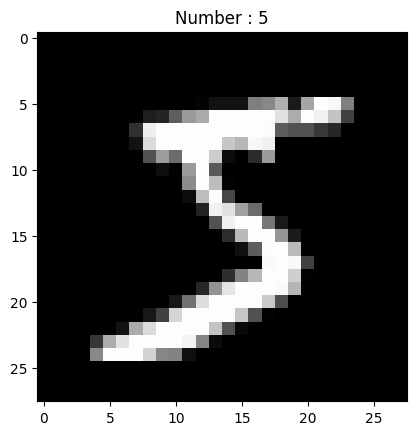

In [6]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')
plt.title(f'Number : {ytrain[0]}')
plt.show()

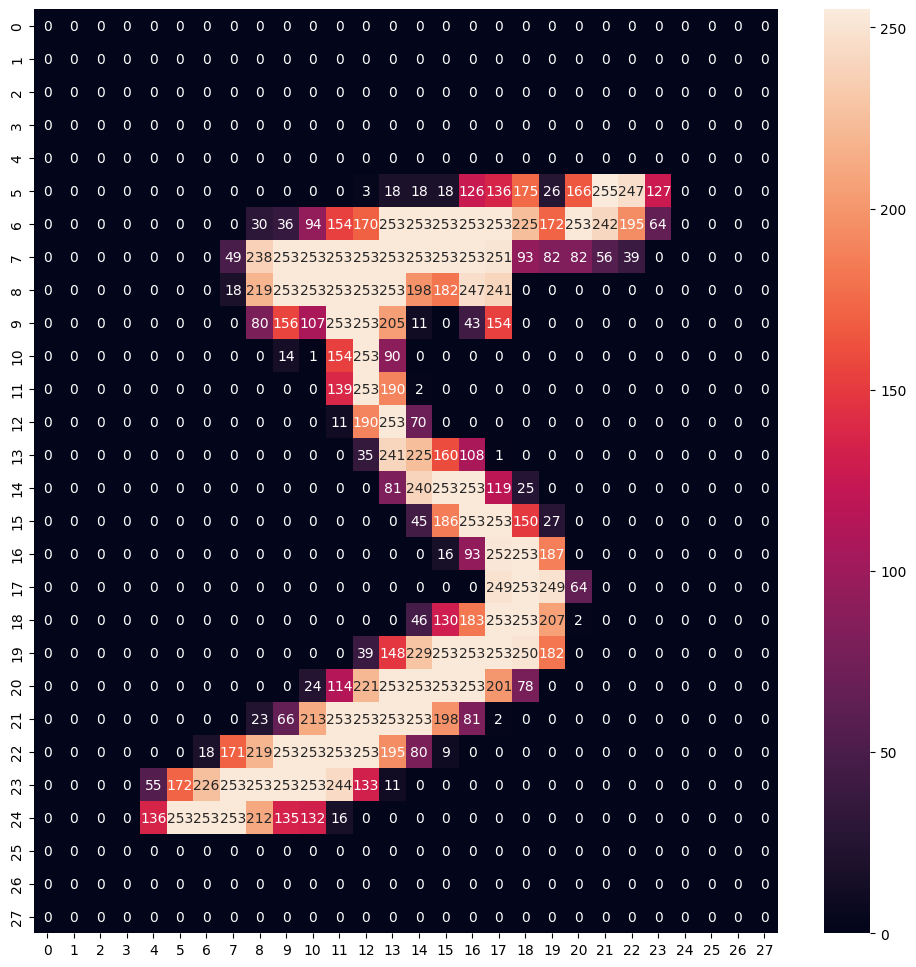

In [7]:
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(xtrain[0], annot=True, fmt='d')
plt.show()

## Seeing top 9 results from xtrain 


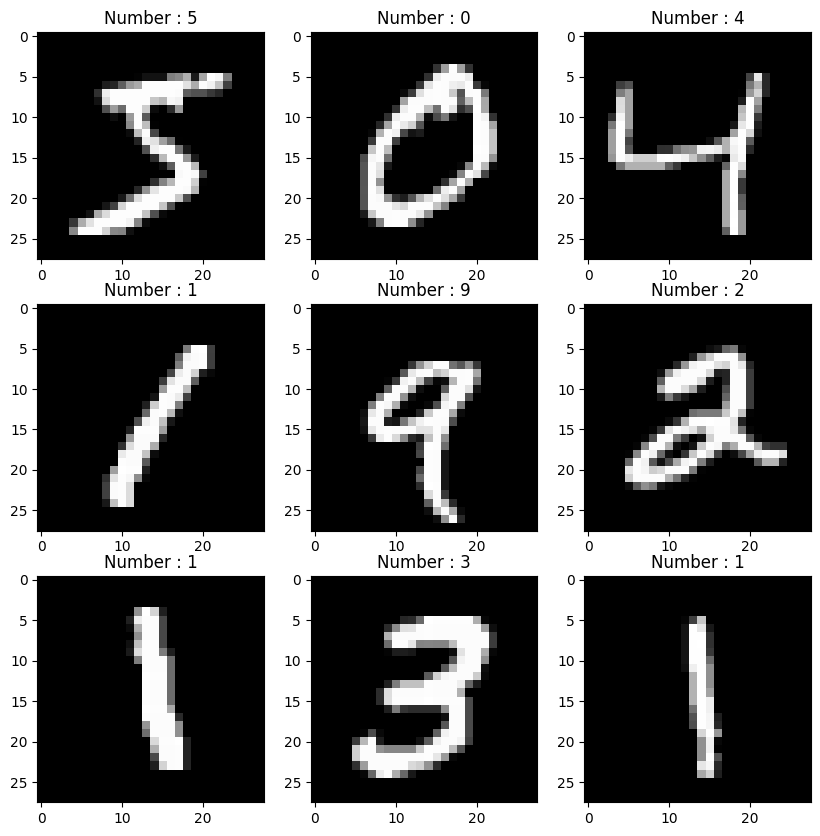

In [8]:
plt.figure(figsize=(10,10))
x = 1
for i in range(9):
    plt.subplot(3,3,x)
    x = x+1
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f'Number : {ytrain[i]}')
plt.show()

## Pre Processing Images


In [9]:
xtrain_scl = xtrain/255 
xtest_scl = xtest/255

In [10]:
import numpy as np 
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Convert ytrain and ytest to categorical 

In [11]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [12]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [13]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Batch Normalization Layer will act like standard scaler to each image

In [14]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense 

In [15]:
model = Sequential()

# Create Convolutional Layer 1
model.add(Convolution2D(16, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Create convolution layer 2
model.add(Convolution2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Create a flatten Layer
model.add(Flatten())

# Create a Dense Layer
model.add(Dense(256, activation='relu'))

# Create an output layer 
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0

## Compile the Model 

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit Model 

In [18]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.2, epochs=5)

Epoch 1/5


1500/1500 [==============================] - 17s 8ms/step - loss: 0.1341 - accuracy: 0.9568 - val_loss: 0.0696 - val_accuracy: 0.9792
Epoch 2/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0541 - accuracy: 0.9830 - val_loss: 0.0483 - val_accuracy: 0.9855
Epoch 3/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0399 - accuracy: 0.9874 - val_loss: 0.0524 - val_accuracy: 0.9851
Epoch 4/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0321 - accuracy: 0.9895 - val_loss: 0.0456 - val_accuracy: 0.9881
Epoch 5/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0266 - accuracy: 0.9912 - val_loss: 0.0472 - val_accuracy: 0.9866


## Plot the learning Curve 

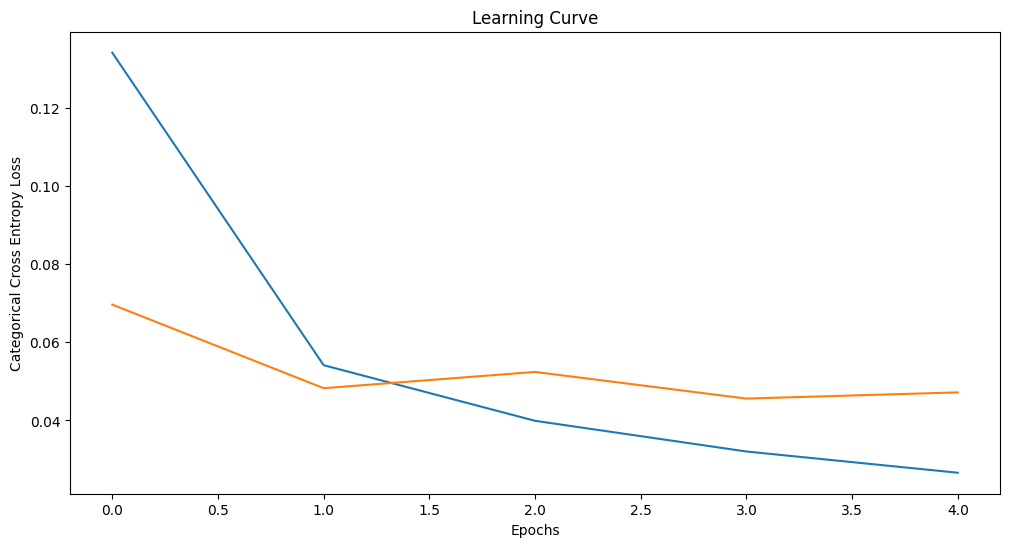

In [19]:
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy Loss')
plt.title('Learning Curve')
plt.show()

## Evaluate model in train and test 

In [20]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 11s 3ms/step - loss: 0.0250 - accuracy: 0.9924


[0.024954749271273613, 0.9923666715621948]

In [21]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 2s 4ms/step - loss: 0.0426 - accuracy: 0.9881


[0.04257649928331375, 0.988099992275238]

## Predict results for train and test 

In [22]:
yprob_tr = model.predict(xtrain_scl)
yprob_ts = model.predict(xtest_scl)

313/313 [==============================] - 1s 3ms/step


In [23]:
yprob_tr[0:5]

array([[1.4642481e-12, 1.3685441e-08, 2.3579720e-11, 1.4079607e-04,
        2.6514173e-11, 9.9985921e-01, 2.5045019e-10, 1.5434065e-09,
        7.4923694e-09, 3.1231131e-08],
       [1.0000000e+00, 3.2108324e-12, 7.7843905e-11, 1.6011243e-13,
        2.3098680e-12, 1.0573066e-12, 8.7984037e-11, 4.4376881e-11,
        4.9437947e-11, 5.6546536e-08],
       [8.1048017e-15, 1.2675339e-09, 7.3282025e-10, 1.3940750e-12,
        9.9999988e-01, 7.8917336e-13, 1.3510419e-16, 1.4076920e-07,
        2.7268265e-13, 2.0215840e-09],
       [1.0133555e-12, 1.0000000e+00, 3.0848582e-10, 2.4745104e-18,
        2.0793599e-10, 6.2073757e-13, 1.4017381e-12, 3.5106993e-08,
        1.2597644e-11, 1.3710222e-13],
       [6.4292755e-07, 1.0508379e-04, 1.1034497e-05, 1.3866288e-06,
        3.1021532e-02, 4.5406043e-08, 1.7180736e-07, 2.4486877e-04,
        8.7227520e-05, 9.6852803e-01]], dtype=float32)

## Predicting numbers 

In [24]:
ypred_tr = np.argmax(yprob_tr, axis=1)
ypred_ts = np.argmax(yprob_ts, axis=1)

In [25]:
ypred_tr[0:5]

array([5, 0, 4, 1, 9], dtype=int64)

In [26]:
ytrain[0:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [27]:
ypred_ts[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [28]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Create a Confusion Matrix 

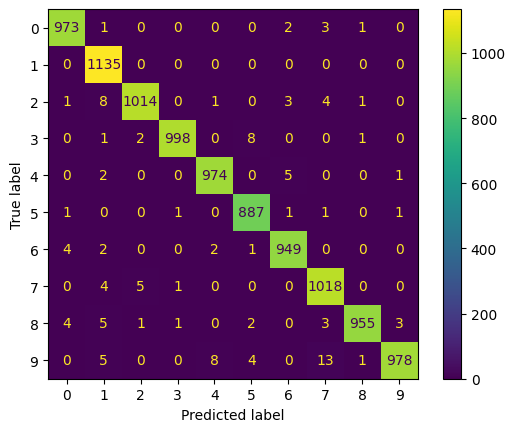

In [29]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

##  Print Classification report 

In [30]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Saving the model for future 

In [31]:
model.save('HandwrittenModel.keras')

## loading the model 

In [32]:
from keras.models import load_model

In [33]:
nn = load_model('HandwrittenModel.keras')

In [34]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0